In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv') # 讀取資料，請勿更改路徑

看看訓練資料集中所含的資料長什麼樣（列出前3個就好）

In [2]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


能確定 `Survived` 是 label

In [3]:
df.describe() # show only numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


將訓練資料集的缺失資料以視覺化的效果來呈現

<AxesSubplot:>

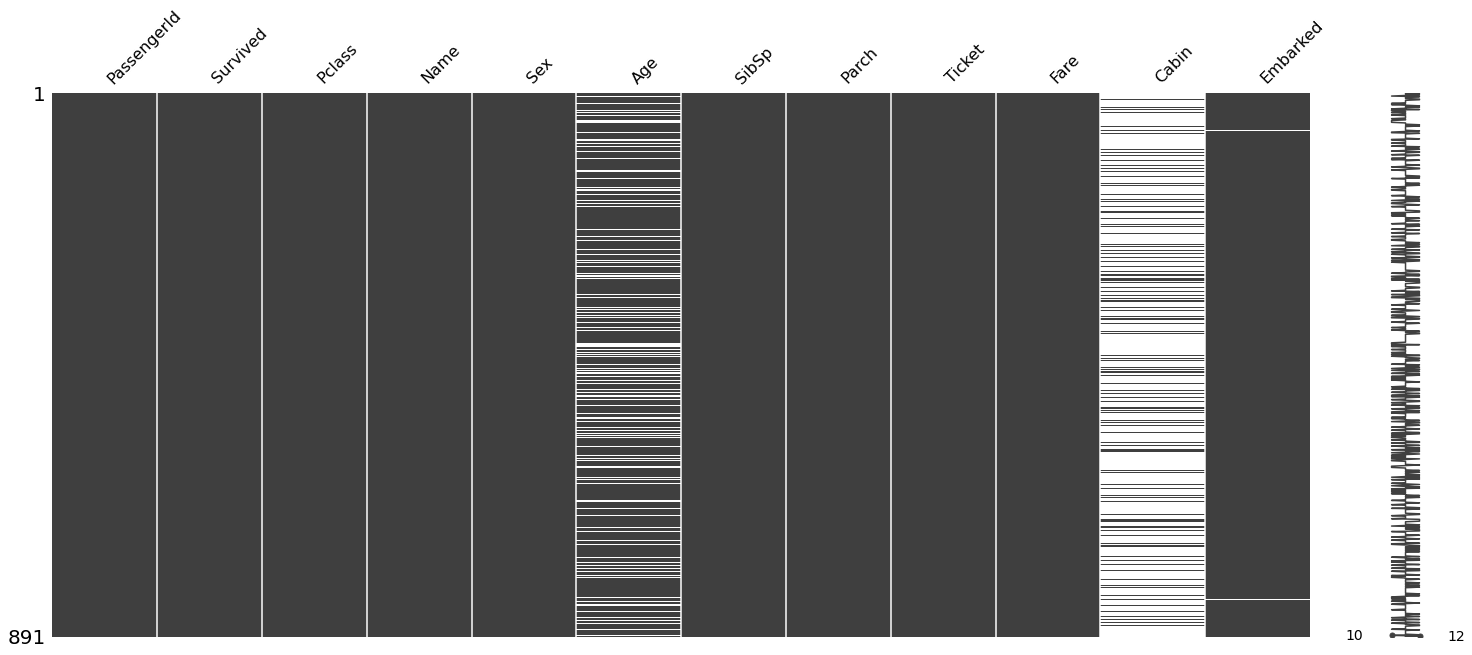

In [7]:
import missingno as msn

msn.matrix(df)

直接列出訓練資料集中各欄位的的缺失值有多少

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

可見 `Cabin` 因缺失值過多，可以直接去除

而雖然 `Age` 中也有缺失值，但可以考慮利用不同的「補值」方式，將缺失值補上
- 平均值 / 中位數 / KNN預測

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print('該訓練資料集中所擁有的欄位：')
df.columns

該訓練資料集中所擁有的欄位：


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

去除 `PassengerId`, `Name`, `Ticket`, `Cabin` 後，只留下要觀察的欄位，並存於 `cols`

觀察看看各欄位資料中，`Survived` 的分佈比例

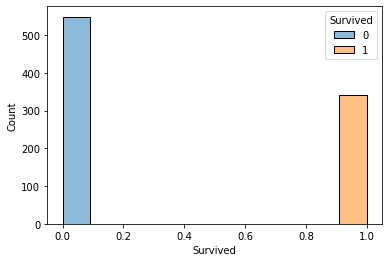

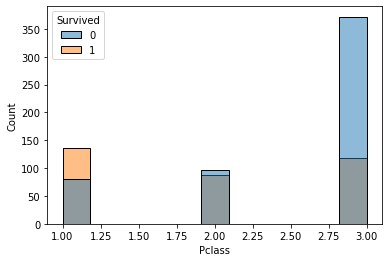

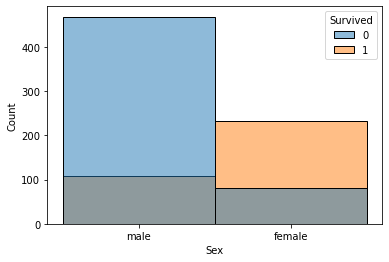

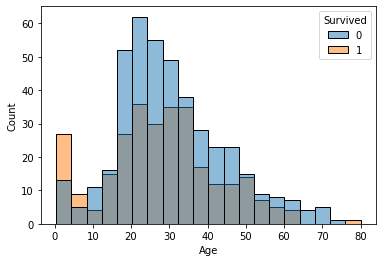

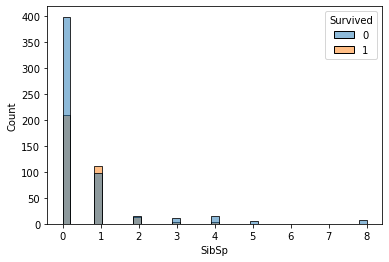

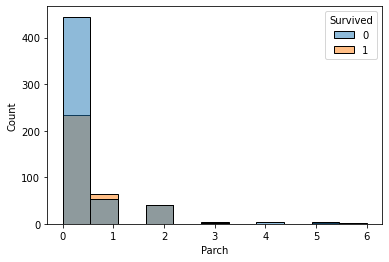

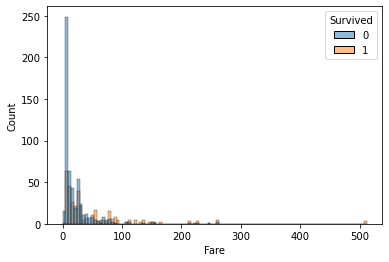

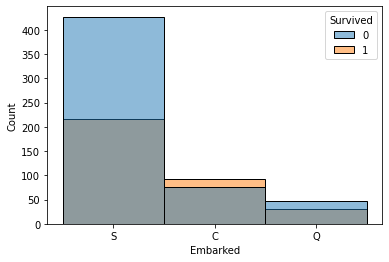

In [12]:
cols = [
    'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 
    'Parch', 'Fare', 'Embarked'
    ]
for col in cols:
    sns.histplot(data = df, x = col, hue = 'Survived')
    plt.show()

In [13]:
# 取出訓練資料需要分析的資料欄位
train_x = df[['Pclass', 'Sex', 'Age']]

# 取出訓練資料的答案
train_y = df['Survived']

In [14]:
print(train_x.head(1))
print()
train_x.isna().sum()

   Pclass   Sex   Age
0       3  male  22.0



Pclass      0
Sex         0
Age       177
dtype: int64

用來訓練的資料中含有類別資料，所以需要將其做 label encoding

且需將 `Age` 中的缺失值補齊

In [15]:
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder

le = LabelEncoder()                            # 創造 Label Encoder
le.fit(train_x['Sex'])                         # 給予每個類別一個數值
train_x['Sex'] = le.transform(train_x['Sex'])  # 轉換所有類別成為數值

/var/folders/cl/mnp8mwzx3hg265f0p2tv79d00000gn/T/ipykernel_21784/2275341373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Sex'] = le.transform(train_x['Sex'])  # 轉換所有類別成為數值


In [16]:
# imputed with knn
from fancyimpute import KNN

train_x = pd.DataFrame(
    KNN().fit_transform(train_x), 
    columns=['Pclass', 'Sex', 'Age'])

train_x.isna().sum()

Imputing row 1/891 with 0 missing, elapsed time: 0.087
Imputing row 101/891 with 0 missing, elapsed time: 0.092
Imputing row 201/891 with 0 missing, elapsed time: 0.093
Imputing row 301/891 with 1 missing, elapsed time: 0.094
Imputing row 401/891 with 0 missing, elapsed time: 0.095
Imputing row 501/891 with 0 missing, elapsed time: 0.096
Imputing row 601/891 with 0 missing, elapsed time: 0.097
Imputing row 701/891 with 0 missing, elapsed time: 0.097
Imputing row 801/891 with 0 missing, elapsed time: 0.098


Pclass    0
Sex       0
Age       0
dtype: int64

In [17]:
# 原助教的 code
#from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具

#imputer = SimpleImputer(strategy='median')     # 創造 imputer 並設定填補策略
#age = train_x['Age'].to_numpy().reshape(-1, 1)
#imputer.fit(age)                               # 根據資料學習需要填補的值
#train_x['Age'] = imputer.transform(age)        # 填補缺失值

#train_x.isna().sum()

# Model training and evaluations

model: decision tree

evaluation method: kfold, accuracy

In [25]:
# 模型訓練 decision tree

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8880501757095356
    min train accuracy: 0.879382889200561
    max train accuracy: 0.898876404494382
average valid accuracy: 0.786793045006591
    min valid accuracy: 0.7541899441340782
    max valid accuracy: 0.8314606741573034


model: KNN

evaluation method: kfold, accuracy

In [26]:
# 模型訓練 knn

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.neighbors import KNeighborsClassifier    # 匯入knn模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = KNeighborsClassifier(n_jobs=-1)           # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8280055785807712
    min train accuracy: 0.8162692847124825
    max train accuracy: 0.8398876404494382
average valid accuracy: 0.7452953361370913
    min valid accuracy: 0.6871508379888268
    max valid accuracy: 0.8426966292134831


model: random forest

evaluation method: kfold, accuracy

In [27]:
# 模型訓練 random forest

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.ensemble import RandomForestClassifier   # 匯入隨機森林模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = RandomForestClassifier(random_state=1012, n_jobs=-1) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8880501757095356
    min train accuracy: 0.879382889200561
    max train accuracy: 0.898876404494382
average valid accuracy: 0.7856945577804282
    min valid accuracy: 0.7318435754189944
    max valid accuracy: 0.8426966292134831


model: catboost

evaluation method: kfold, accuracy

In [32]:
# 模型訓練 catboost

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from catboost import CatBoostClassifier               # 匯入boosting模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = CatBoostClassifier(random_state=1012, iterations=3000, depth=10) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

Learning rate set to 0.003254
0:	learn: 0.6912052	total: 580us	remaining: 1.74s
1:	learn: 0.6891581	total: 1.55ms	remaining: 2.32s
2:	learn: 0.6872445	total: 2.86ms	remaining: 2.85s
3:	learn: 0.6848123	total: 3.83ms	remaining: 2.87s
4:	learn: 0.6827687	total: 4.65ms	remaining: 2.78s
5:	learn: 0.6807837	total: 5.74ms	remaining: 2.86s
6:	learn: 0.6788172	total: 6.52ms	remaining: 2.79s
7:	learn: 0.6765594	total: 7.3ms	remaining: 2.73s
8:	learn: 0.6744881	total: 8.09ms	remaining: 2.69s
9:	learn: 0.6726816	total: 8.84ms	remaining: 2.64s
10:	learn: 0.6702957	total: 10ms	remaining: 2.73s
11:	learn: 0.6686317	total: 10.5ms	remaining: 2.63s
12:	learn: 0.6667545	total: 11.1ms	remaining: 2.54s
13:	learn: 0.6647510	total: 12.3ms	remaining: 2.62s
14:	learn: 0.6629035	total: 13.3ms	remaining: 2.66s
15:	learn: 0.6607119	total: 15.9ms	remaining: 2.96s
16:	learn: 0.6596017	total: 17ms	remaining: 2.98s
17:	learn: 0.6578541	total: 17.8ms	remaining: 2.95s
18:	learn: 0.6561121	total: 18.6ms	remaining: 2.92

In [33]:
print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8639212380036876
    min train accuracy: 0.8513323983169705
    max train accuracy: 0.8792134831460674
average valid accuracy: 0.8025296591551063
    min valid accuracy: 0.7486033519553073
    max valid accuracy: 0.8258426966292135


In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))